# Week 3: Bag-of-Words language models and naive classification

In [ ]:
from nltk.corpus import movie_reviews
import random
import math
from collections import Counter
random.seed(123)

We are going to implement a naive bayes classifier for movie reviews! Any classifier starts with two inputs, (1) the set of classes and (2) the documents to classify -- in particular, when we need to *train or learn* a classifier, we need a subset of these documents to be labeled for training. 

(1) Here is the set of classes:

In [ ]:
movie_reviews.categories()

(2) Here is the set of labelled documents:

In [ ]:
labeled_reviews = [(movie_reviews.words(fileid), 'pos') for fileid in movie_reviews.fileids(categories=['pos'])[:300]] + [(movie_reviews.words(fileid), 'neg') for fileid in movie_reviews.fileids(categories=['neg'])[:300]]

In [ ]:
len(labeled_reviews)

Let's split our data into a train set and test set.

In [ ]:
random.shuffle(labeled_reviews)
train_set = labeled_reviews[:500]
test_set = labeled_reviews[500:]

Note that each review has been tokenized into a set of words already. For example here is the first pair of our train set in the format (review, class) :

In [ ]:
train_set[0]

We want to be able to represent each document or a set of documents as a bag-of-words. Write a helper function that takes a dataset and returns a list containing a single sequence of tokens which concatenates all reviews in the dataset.

In [ ]:
def get_tokens(dataset):
    tokens = []
    ## TO DO
    
    ##
    return tokens

Now write a helper function which returns the list of types in the dataset, or the vocabulary. In other words, it should return the list of unique tokens across a dataset.

In [ ]:
def get_vocabulary(dataset):
    types = []
    ## TO DO
    
    ##
    return types

Now write a function that takes a sequence of tokens and a vocabulary, gets their counts of tokens and normalizes them by total token count to return a dictionary of token frequencies, or BoW model. Note that this version of a BoW model implements Laplace smoothing

In [ ]:
def BoW(sequence_tokens, vocabulary):
    BoW = {t: 1.0 for t in vocabulary}
    ## TO DO
    
    ##
    return BoW

Recall the definition of our Naive Bayes classifier:
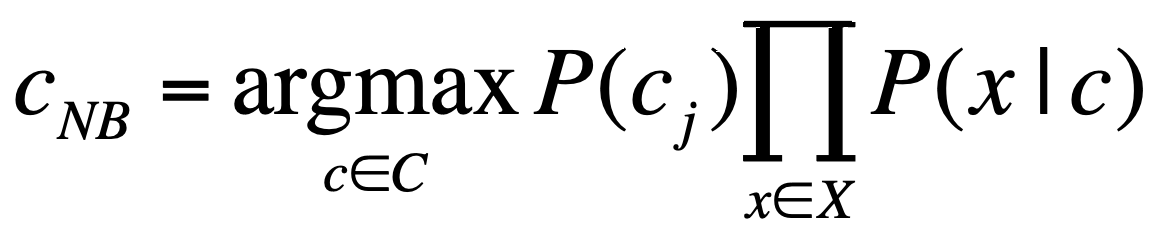

So for each category $c_j$, we need to get the prior probability of the category $P(c_j)$ as well as the likelihood of each word $x$ given that it appears in some document in category $c_j$.

Now, let's create a function which gets the prior probability of a category in a dataset.

In [ ]:
def get_prior(cat, dataset):
    prob = 0.0
    ## TO DO
    
    ##
    return prob

In [ ]:
get_prior('pos', train_set)

Next, let's create a function which returns the likelihoods of all tokens in a dataset conditioned on them appearing in a review of category cat.

In [ ]:
def get_likelihood(cat, dataset, vocabulary):
    cat_dist = {}
    cat_dataset = [(sent, c) for (sent, c) in dataset if c == cat]
    ## TO DO
    
    ##
    return cat_dist

In [ ]:
test = get_likelihood('neg', train_set, get_vocabulary(train_set))

Now we can implement our Naive Bayes classifier, note that we do so in logspace:

In [ ]:
def NB_classifier(categories, train_set, test_set):
    # 1: The first step is to **learn** the set of features for each category, represented in the form of a multinomial distribution
    multinomial_dist = dict()
    vocab = get_vocabulary(train_set+test_set)
    for cat in categories:
        dist = get_likelihood(cat, train_set, vocab)
        prior = get_prior(cat, train_set)
        multinomial_dist[cat] = {'prior':prior, 'dist':dist}
    # 2: The second step is the prediction step where we use our fitted model to predict a label for each document in test_set. 
    #    We will return these predictions.
    predictions = []
    for review, label in test_set:
        posterior = dict()
        for cat in categories:
            likelihood = 0.0
            log_prior = math.log(multinomial_dist[cat]['prior'])
            likelihood = sum([math.log(multinomial_dist[cat]['dist'][token]) for token in review ])
            posterior[cat] = prior + likelihood
        prediction = max(posterior, key=posterior.get)
        predictions.append({'review':review, 'label':label, 'prediction': prediction})
    return predictions

In [ ]:
predictions = NB_classifier(movie_reviews.categories(), train_set, test_set)

Finally, let's write a function which returns the accuracy of a set of predictions given a category.

In [ ]:
def get_accuracy_scores(cat, predictions):
    precision = 0.0
    recall = 0.0
    f1 = 0.0
    ## TO DO
    
    ##
    return {'cat':cat , 'precision':precision, 'recall':recall, 'f1':f1}

In [ ]:
get_accuracy_scores('pos', predictions)

In [ ]:
get_accuracy_scores('neg', predictions)

**What are other techniques we have seen that could improve the performance of our NB classifier?** Think about other preprocessing steps you may want to try.